# Case Study: RMS dataset Kaplan Meier analysis.


### This notebook uses a dataset provided by Maja C who studies pediatric oncology patients. 

In [33]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import datetime as dt
%matplotlib inline

 
file = r'RMS tabela final-6.xls'
df = pd.read_excel(file, sheet_name='Sheet2')
df.shape

(189, 21)

In [34]:
#Display first 10 raws of the table

df.head(10)

,zap st,dan,mesec,leto roj,dan.1,mesec.1,leto dg,patol,IRS,mesto,...,meta,bezgavke,operacija,"R0,1,2",RT,RT ob relapsu,dan.2,mesec.2,leto smrti,status
0,MB,11.0,2.0,1985.0,7.0,2.0,2000.0,2,4.0,5,...,2,2,2,NaN,1,1.0,4.0,12.0,2000.0,2
1,KGP,30.0,7.0,1990.0,27.0,2.0,2001.0,3,4.0,5,...,3,2,2,NaN,2,NaN,25.0,8.0,2001.0,2
2,KM,23.0,12.0,1993.0,9.0,5.0,2001.0,1,3.0,2,...,1,2,2,NaN,1,NaN,NaN,NaN,NaN,1
3,SN,20.0,9.0,1999.0,20.0,10.0,2001.0,1,4.0,5,...,2,1,1,1,1,2.0,8.0,1.0,2004.0,2
4,KK,15.0,12.0,1996.0,1.0,2.0,2002.0,1,1.0,8,...,1,1,1,0,2,NaN,NaN,NaN,NaN,1
5,ST,19.0,9.0,1986.0,5.0,8.0,2002.0,1,3.0,2,...,1,1,2,NaN,1,NaN,NaN,NaN,NaN,1
6,HZ,3.0,4.0,2002.0,14.0,2.0,2003.0,1,3.0,7,...,1,1,1,1,2,2.0,NaN,NaN,NaN,1
7,MM,27.0,1.0,1992.0,27.0,10.0,2003.0,1,3.0,2,...,1,1,2,NaN,1,NaN,NaN,NaN,NaN,1
8,ZI,6.0,11.0,1985.0,3.0,10.0,2003.0,2,3.0,5,...,1,2,2,NaN,1,2.0,24.0,5.0,2004.0,2
9,KK,22.0,12.0,1988.0,6.0,1.0,2005.0,4,1.0,8,...,1,2,1,1,1,NaN,NaN,NaN,NaN,1


In [35]:
#Display last 10 raws of the table

df.tail(10)

,zap st,dan,mesec,leto roj,dan.1,mesec.1,leto dg,patol,IRS,mesto,...,meta,bezgavke,operacija,"R0,1,2",RT,RT ob relapsu,dan.2,mesec.2,leto smrti,status
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1=E,NaN,1=H/N,...,NaN,NaN,1=yes,R0=0,1=Y,NaN,NaN,NaN,NaN,1=ziv
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2=A,NaN,2=parameningeal,...,NaN,NaN,2=no,R1=1,2=N,NaN,NaN,NaN,NaN,2=mrtev
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3=ni znano,NaN,3=orbita,...,NaN,NaN,NaN,R2=2,NaN,NaN,NaN,NaN,NaN,3=toksicna smrt
184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4=spindle, botroid",NaN,4=okoncine,...,NaN,NaN,NaN,R3=3,NaN,NaN,NaN,NaN,NaN,NaN
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5=toraks,...,1=ni meta,1=neg,NaN,4=ni znano,NaN,NaN,NaN,NaN,NaN,NaN
186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6=abdomen, pelvis, retroperitonej",...,2=meta,2=poz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7=bladder/prostate,...,3=samo pulmo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8=testis, uterus, vagina",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning and preparing data


In [36]:
## delete rows from 181 to the end row since they contain the legend
df.drop(df.iloc[181:189,].index, inplace=True)

In [37]:
## delete rows that have all values NaN
df.dropna(how="all", inplace=True)

In [38]:
## delete rows from index 170 to index 179 since user cannot get missing data
df.drop(df.iloc[170:179,].index, inplace=True)

In [39]:
#set date of diagnosis to 1 for patients in rows 139-169 according to client (they did not have the date of diagnosis
# but only age at diagnosis)
df['dan.1'].loc[139:170]=1


c:\users\asustic\miniconda3\envs\deep-learning\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [40]:
df.tail(3)

,zap st,dan,mesec,leto roj,dan.1,mesec.1,leto dg,patol,IRS,mesto,...,meta,bezgavke,operacija,"R0,1,2",RT,RT ob relapsu,dan.2,mesec.2,leto smrti,status
167,LHRA,23.0,10.0,2012.0,1.0,4.0,2014.0,1,1.0,2,...,1,1,1,0,2,2.0,NaN,NaN,NaN,1
168,KKAL,19.0,2.0,1999.0,1.0,4.0,2014.0,1,4.0,2,...,3,1,2,NaN,1,NaN,NaN,4.0,2014.0,2
169,IRAF,12.0,11.0,2012.0,1.0,5.0,2014.0,4,3.0,6,...,2,2,2,NaN,2,NaN,1.0,12.0,2014.0,2


### calculate age of patients at diagnosis


In [41]:
#transform month of birth to string
df['mesec'] = df['mesec'].fillna(value=1).astype('int').apply(str)

In [42]:
#transform day of birth to string
df['dan'] = df['dan'].fillna(value=1).astype('int').apply(str)

In [43]:
#transform year of birth to string
df['leto roj'] = df['leto roj'].fillna(value=1).astype('int').apply(str)

In [44]:
#insert new column with date object for DOB
df.insert(4,'rojen', pd.to_datetime(df['leto roj'] + '-' + df['mesec'] + '-' + df['dan']))

In [45]:
#transform month of diagnosis to string
df['mesec.1'] = df['mesec.1'].fillna(value=1).astype('int').apply(str)

In [46]:
#transform day of diagnosis to string
df['dan.1'] = df['dan.1'].fillna(value=1).astype('int').apply(str)

In [47]:
#transform year of diagnosis to string
df['leto dg'] = df['leto dg'].fillna(value=1).astype('int').apply(str)

In [48]:
#insert new column with date object for diagnosis 
df.insert(8,'diagnoza', pd.to_datetime(df['leto dg'] + '-' + df['mesec.1'] + '-' + df['dan.1'], errors = "coerce"))

In [49]:
df.insert(9,'age at diganosis',round((df['diagnoza'] - df['rojen'])/np.timedelta64(1,'Y'),2))

In [50]:
df.shape

(170, 24)

In [51]:
#delete patient who is older then 18 / outlier
df.drop(df.loc[df['age at diganosis']>18].index, inplace=True)

In [52]:

df.shape

(169, 24)

## calculate date of death for status 2 or 3 

In [53]:
# set value for month of death (mesec.2) where it is null to 4 (april)
df.loc[((df['status']==2)|(df['status']==3))&(df['mesec.2'].isnull()),['mesec.2']]=4

In [54]:
# set value for day of death (day.2) where it is null to 1 
df.loc[((df['status']==2)|(df['status']==3))&(df['dan.2'].isnull()),['dan.2']]=1

In [55]:
#transform day of death to string
df.loc[(df['status']==2)|(df['status']==3),['dan.2']]=df.loc[(df['status']==2)|(df['status']==3)]['dan.2'].astype('int').apply(str)

In [56]:
#transform month of death to string
df.loc[(df['status']==2)|(df['status']==3),['mesec.2']]=df.loc[(df['status']==2)|(df['status']==3)]['mesec.2'].astype('int').apply(str)

In [57]:
#transform year of death to string
df.loc[(df['status']==2)|(df['status']==3),['leto smrti']]=df.loc[(df['status']==2)|(df['status']==3)]['leto smrti'].astype('int').apply(str)

In [58]:
#insert new column with date death 
df.insert(23,'datum smrti', pd.to_datetime(df['leto smrti'] + '-' + df['mesec.2'] + '-' + df['dan.2']))

In [59]:
df.head(10)

,zap st,dan,mesec,leto roj,rojen,dan.1,mesec.1,leto dg,diagnoza,age at diganosis,...,bezgavke,operacija,"R0,1,2",RT,RT ob relapsu,dan.2,mesec.2,leto smrti,datum smrti,status
0,MB,11,2,1985,1985-02-11,7,2,2000,2000-02-07,14.99,...,2,2,NaN,1,1.0,4,12,2000,2000-12-04,2
1,KGP,30,7,1990,1990-07-30,27,2,2001,2001-02-27,10.58,...,2,2,NaN,2,NaN,25,8,2001,2001-08-25,2
2,KM,23,12,1993,1993-12-23,9,5,2001,2001-05-09,7.38,...,2,2,NaN,1,NaN,NaN,NaN,NaN,NaT,1
3,SN,20,9,1999,1999-09-20,20,10,2001,2001-10-20,2.08,...,1,1,1,1,2.0,8,1,2004,2004-01-08,2
4,KK,15,12,1996,1996-12-15,1,2,2002,2002-02-01,5.13,...,1,1,0,2,NaN,NaN,NaN,NaN,NaT,1
5,ST,19,9,1986,1986-09-19,5,8,2002,2002-08-05,15.88,...,1,2,NaN,1,NaN,NaN,NaN,NaN,NaT,1
6,HZ,3,4,2002,2002-04-03,14,2,2003,2003-02-14,0.87,...,1,1,1,2,2.0,NaN,NaN,NaN,NaT,1
7,MM,27,1,1992,1992-01-27,27,10,2003,2003-10-27,11.75,...,1,2,NaN,1,NaN,NaN,NaN,NaN,NaT,1
8,ZI,6,11,1985,1985-11-06,3,10,2003,2003-10-03,17.91,...,2,2,NaN,1,2.0,24,5,2004,2004-05-24,2
9,KK,22,12,1988,1988-12-22,6,1,2005,2005-01-06,16.04,...,2,1,1,1,NaN,NaN,NaN,NaN,NaT,1


## Kaplan Meier

https://lifelines.readthedocs.io/en/latest/Quickstart.html

In [60]:
df['diagnoza']
df['datum smrti'].isna().sum()

101

In [61]:
from lifelines.utils import datetimes_to_durations
start_dates = df['diagnoza']
end_dates = df['datum smrti']
#https://lifelines.readthedocs.io/en/latest/lifelines.utils.html#lifelines.utils.datetimes_to_durations
#
T, E = datetimes_to_durations(start_dates, end_dates, freq="Y")


In [62]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)  # or, more succinctly, kmf.fit(T, E)

<lifelines.KaplanMeierFitter: fitted with 169 observations, 101 censored>

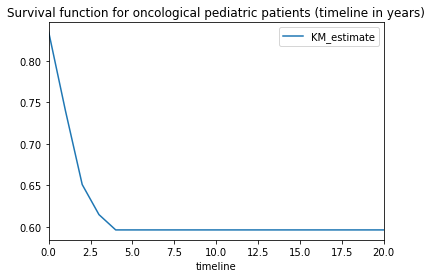

In [63]:
kmf.survival_function_
kmf.survival_function_.plot()
plt.title('Survival function for oncological pediatric patients (timeline in years)');

How do we interpret this? The y-axis represents the probability a patient is still around after t years, where t years is on the x-axis. 

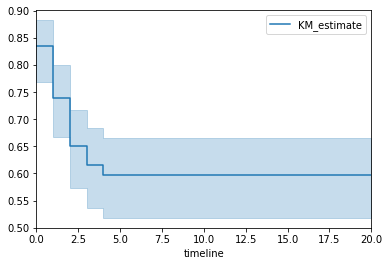

In [64]:
kmf.plot()

The band shows how uncertain we are about these point estimates, i.e., the confidence intervals. 